In [28]:
import pandas as pd
import numpy as np
from sklearn import preprocessing,metrics
import matplotlib.pyplot as plt 
#plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
%matplotlib inline
from sklearn.metrics import confusion_matrix,classification_report


In [29]:
df = pd.read_csv("df_perfect_final.csv", header=0)
df.shape

(5561, 50)

In [30]:
df.head()

,Unnamed: 0,Unnamed: 0.1,normalized_name,success,investor_participants,Round_1_amount,Round_2_amount,Round_3_amount,Round_4_amount,Round_5_amount,...,ecommerce,analytics,games_video,cleantech,other_category,Round1_Missing_fg,Round2_Missing_fg,Round3_Missing_fg,Round4_Missing_fg,Round5_Missing_fg
0,0,0,wetpaint,1,9,0,5250000,9500000,25000000,0,...,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0
1,1,1,slacker,1,17,0,13500000,40000000,0,9600000,...,0,0,0,0,1,1.0,0.0,0.0,1.0,0.0
2,2,2,livestream,1,1,2700000,10000000,0,0,0,...,0,0,1,0,0,0.0,0.0,1.0,1.0,1.0
3,3,3,ustream,1,10,1700000,11800000,46600000,0,0,...,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0
4,4,4,topix,1,6,0,0,15000000,0,0,...,0,0,0,0,0,1.0,1.0,0.0,0.0,0.0


In [31]:
df=df.drop(['Unnamed: 0.1','Unnamed: 0','funding_velocity','normalized_name'],axis=1)

In [32]:
# remove round1_fg - round6_fg because it was derived from Round_1_amount - Round_6_amount          
df=df.drop(['round1_fg','round2_fg','round3_fg','round4_fg','round5_fg','round6_fg'],axis=1)

In [33]:
from sklearn.preprocessing import MinMaxScaler
#from sklearn import preprocessing
minmaxScaler = preprocessing.MinMaxScaler() 

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5561 entries, 0 to 5560
Data columns (total 40 columns):
success                      5561 non-null int64
investor_participants        5561 non-null int64
Round_1_amount               5561 non-null int64
Round_2_amount               5561 non-null int64
Round_3_amount               5561 non-null int64
Round_4_amount               5561 non-null int64
Round_5_amount               5561 non-null int64
Round_6_amount               5561 non-null int64
funding_rounds               5561 non-null int64
funding_total_usd            5561 non-null int64
relationships                5561 non-null int64
FounderCounter               5561 non-null int64
C_Level_Counter              5561 non-null int64
female_fg                    5561 non-null int64
dropout_fg                   5561 non-null int64
count_degrees                5561 non-null int64
school_counter               5561 non-null int64
MBA_fg                       5561 non-null int64
venture_cap

In [35]:
#minmaxscaling variables with large values 
df1=minmaxScaler.fit_transform(df[['Round_1_amount','Round_2_amount','Round_3_amount','Round_4_amount','Round_5_amount','Round_6_amount',\
                              'funding_total_usd','days_since_last_funding']])
df2=pd.DataFrame(df1,columns=['Round_1_amount','Round_2_amount','Round_3_amount','Round_4_amount','Round_5_amount','Round_6_amount',\
                              'funding_total_usd','days_since_last_funding'])
df1=df.drop(['Round_1_amount','Round_2_amount','Round_3_amount','Round_4_amount','Round_5_amount','Round_6_amount',\
                              'funding_total_usd','days_since_last_funding'],axis=1)
dff=pd.concat([df1,df2],axis=1)

In [36]:
#reduce dimension 
dff['city_ranked_top_ten_city']=dff['city_ranked_top_ten_city']*2
dff['city_ranked']=dff['city_ranked_top_ten_city']+dff['city_ranked_top_five_city']
#software lable=1
dff['biotech']=dff['biotech']*2
dff['enterprise']=dff['enterprise']*3
dff['web']=dff['web']*4
dff['mobile']=dff['mobile']*5
dff['advertising']=dff['advertising']*6
dff['ecommerce']=dff['ecommerce']*7
dff['analytics']=dff['analytics']*8
dff['cleantech']=dff['cleantech']*9
dff['games_video']=dff['games_video']*10
dff['industry']=dff['software']+dff['biotech']+dff['enterprise']+dff['web']+dff['mobile']+dff['advertising']+dff['ecommerce']+dff['analytics']\
+dff['cleantech']+dff['games_video']

In [37]:
dff=dff.drop(['city_ranked_other_city','city_ranked_top_five_city','city_ranked_top_ten_city','cleantech','other_category','analytics','games_video',\
'ecommerce','advertising','mobile','web','software','enterprise','biotech'],axis=1)

In [38]:
dff.describe()

,success,investor_participants,funding_rounds,relationships,FounderCounter,C_Level_Counter,female_fg,dropout_fg,count_degrees,school_counter,...,Round_1_amount,Round_2_amount,Round_3_amount,Round_4_amount,Round_5_amount,Round_6_amount,funding_total_usd,days_since_last_funding,city_ranked,industry
count,5561.000000,5561.000000,5561.000000,5561.000000,5561.000000,5561.000000,5561.000000,5561.000000,5561.000000,5561.000000,...,5561.000000,5561.000000,5561.000000,5561.000000,5561.000000,5561.000000,5561.000000,5561.000000,5561.000000,5561.000000
mean,0.285740,4.087934,2.230714,6.876281,1.653839,1.443266,0.226038,0.528142,2.688545,1.235209,...,0.007746,0.009936,0.021366,0.009298,0.005061,0.002690,0.006323,0.069446,0.391656,2.768207
std,0.451807,5.407196,1.522670,6.177513,1.990745,1.780103,0.418302,0.499252,3.253901,1.702640,...,0.023409,0.029592,0.060770,0.036586,0.031804,0.020674,0.020510,0.070738,0.614128,2.934422
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000307,0.020690,0.000000,0.000000
50%,0.000000,2.000000,2.000000,5.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001428,0.045610,0.000000,2.000000
75%,1.000000,6.000000,3.000000,9.000000,2.000000,2.000000,0.000000,1.000000,3.000000,2.000000,...,0.008333,0.010667,0.000000,0.000000,0.000000,0.000000,0.005865,0.092821,1.000000,5.000000
max,1.000000,54.000000,14.000000,80.000000,22.000000,21.000000,1.000000,1.000000,37.000000,17.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,10.000000


In [39]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5561 entries, 0 to 5560
Data columns (total 28 columns):
success                    5561 non-null int64
investor_participants      5561 non-null int64
funding_rounds             5561 non-null int64
relationships              5561 non-null int64
FounderCounter             5561 non-null int64
C_Level_Counter            5561 non-null int64
female_fg                  5561 non-null int64
dropout_fg                 5561 non-null int64
count_degrees              5561 non-null int64
school_counter             5561 non-null int64
MBA_fg                     5561 non-null int64
venture_capital_fg         5561 non-null int64
age                        5561 non-null int64
Round1_Missing_fg          5561 non-null float64
Round2_Missing_fg          5561 non-null float64
Round3_Missing_fg          5561 non-null float64
Round4_Missing_fg          5561 non-null float64
Round5_Missing_fg          5561 non-null float64
Round_1_amount             5561 non-n

In [40]:
#regression
import statsmodels.api as sm
from scipy import stats
xx=dff.drop('success',axis=1)
yy=dff['success']
xx = sm.add_constant(xx)
resulteLogit= sm.Logit(yy, xx).fit()
resulteLogit.summary()

Optimization terminated successfully.
         Current function value: 0.552454
         Iterations 6


/Users/lianxinyu/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                success   No. Observations:                 5561
Model:                          Logit   Df Residuals:                     5533
Method:                           MLE   Df Model:                           27
Date:                Thu, 26 Mar 2020   Pseudo R-squ.:                 0.07662
Time:                        20:36:28   Log-Likelihood:                -3072.2
converged:                       True   LL-Null:                       -3327.1
Covariance Type:            nonrobust   LLR p-value:                 1.455e-90
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.9312      0.096    -20.180      0.000      -2.119      -1.744
investor_participants       0.0227      0.007      3.042      0.002       0.008       0.037
funding_rounds              0.0257      0.028      0.904      0.366      -0.030       0.082
relationships               0.0254      0.007      3.795      0.000       0.012       0.038
FounderCounter              0.0089      0.017      0.536      0.592      -0.024       0.042
C_Level_Counter             0.0319      0.020      1.609      0.108      -0.007       0.071
female_fg                  -0.1395      0.079     -1.757      0.079      -0.295       0.016
dropout_fg                  0.0219      0.070      0.311      0.756      -0.116       0.160
count_degrees              -0.0091      0.019     -0.477      0.633      -0.047       0.028
school_counter              0.0715      0.031      2.336      0.019       0.012       0.132
MBA_fg                      0.0176      0.059      0.296      0.767      -0.099       0.134
venture_capital_fg          0.0946      0.079      1.204      0.229      -0.059       0.249
age                         0.0589      0.012      4.826      0.000       0.035       0.083
Round1_Missing_fg           0.3722      0.087      4.278      0.000       0.202       0.543
Round2_Missing_fg           0.0751      0.115      0.654      0.513      -0.150       0.300
Round3_Missing_fg           0.1292      0.156      0.826      0.409      -0.177       0.436
Round4_Missing_fg          -0.2601      0.240     -1.083      0.279      -0.731       0.211
Round5_Missing_fg          -0.3888      0.242     -1.607      0.108      -0.863       0.086
Round_1_amount              2.3335      1.433      1.628      0.103      -0.475       5.142
Round_2_amount              4.8493      1.474      3.289      0.001       1.959       7.739
Round_3_amount              1.1133      0.610      1.826      0.068      -0.082       2.308
Round_4_amount              0.2764      1.021      0.271      0.786      -1.724       2.277
Round_5_amount             -0.0262      1.083     -0.024      0.981      -2.148       2.096
Round_6_amount              0.2846      1.534      0.186      0.853      -2.721       3.290
funding_total_usd           1.1362      1.744      0.651      0.515      -2.282       4.554
days_since_last_funding    -1.2400      0.523     -2.369      0.018      -2.266      -0.214
city_ranked                 0.1625      0.051      3.177      0.001       0.062       0.263
industry                    0.0038      0.011      0.351      0.725      -0.017       0.025
===========================================================================================
"""

<function matplotlib.pyplot.show(*args, **kw)>

findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


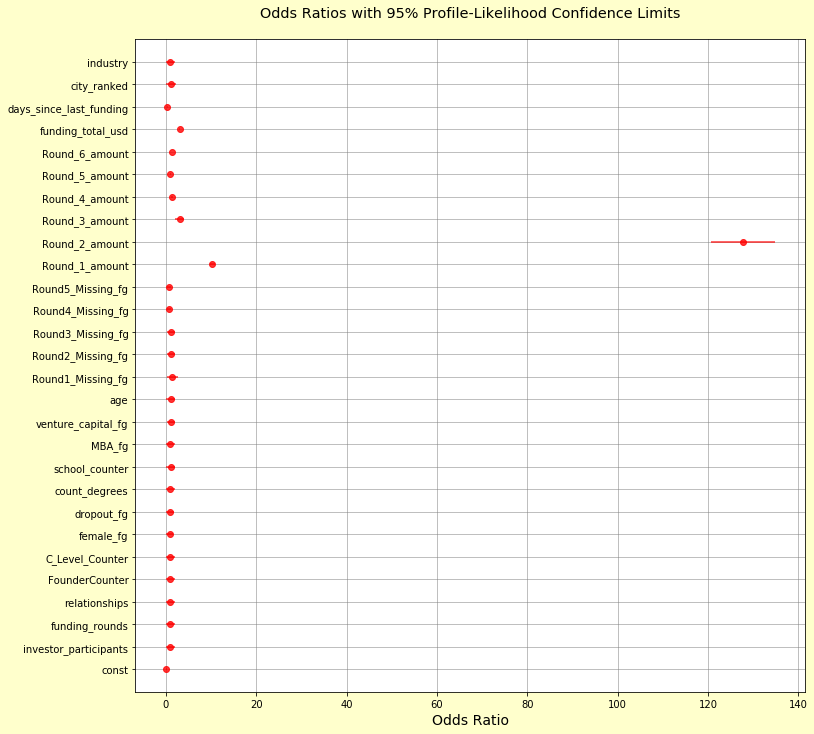

In [41]:
#resulteLogit  OR   
params =resulteLogit.params
conf =resulteLogit.conf_int()
conf['OR'] = params
conf=conf.dropna()
conf=np.exp(conf)
conf.columns = ['2.5%', '97.5%', 'OR']
plt.figure(figsize=(12,12),facecolor='#ffffcc',edgecolor='#ffffcc') 
plt.title('Odds Ratios with 95% Profile-Likelihood Confidence Limits\n',fontsize='x-large' )
yl=len(conf)
plt.ylim(0,yl+1) 
y=np.arange(1,yl+1)
plt.yticks(y,conf.index) #y axis 
plt.xlabel(u'Odds Ratio',fontproperties='SimHei',fontsize=14)
plt.grid( color='grey', linewidth=0.5)
x=conf['OR'] 
plt.errorbar(x=conf['OR'],y=y,xerr=conf['2.5%'],alpha=0.8, color='red',fmt='o')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

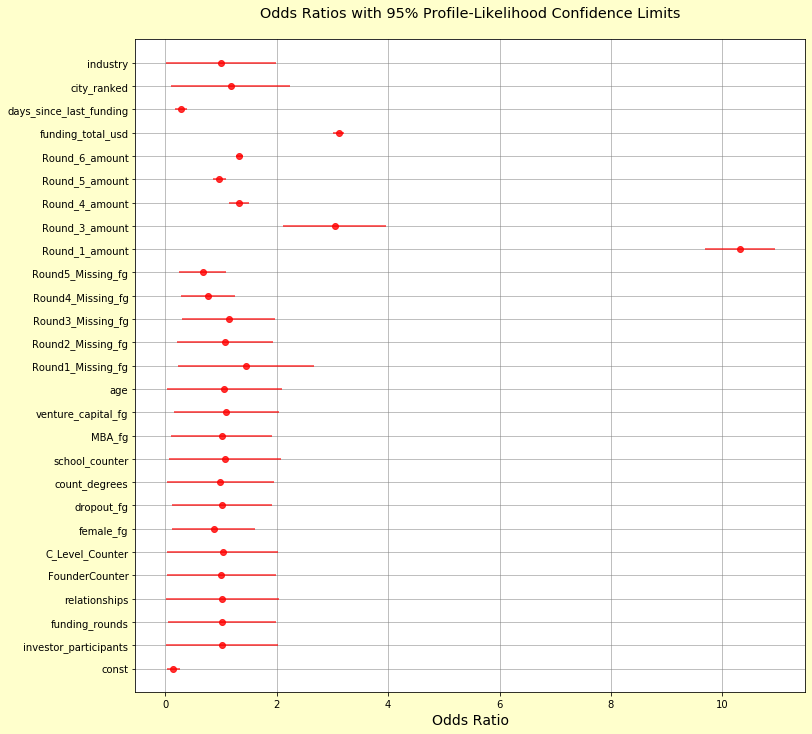

In [42]:
#Not showing Round_2_amount, in order to see other intervals. Round_1_amount、Round_3_amount have high impact 
plt.figure(figsize=(12,12),facecolor='#ffffcc',edgecolor='#ffffcc')
plt.title('Odds Ratios with 95% Profile-Likelihood Confidence Limits\n',fontsize='x-large' )
conf1=conf.drop(['Round_2_amount'])
yl=len(conf1)
plt.ylim(0,yl+1)
y=np.arange(1,yl+1)
plt.yticks(y,conf1.index) 
plt.xlabel(u'Odds Ratio',fontproperties='SimHei',fontsize=14)
x=conf['OR'] 
plt.grid( color='grey', linewidth=0.5)
plt.errorbar(x=conf1['OR'],y=y,xerr=conf1['2.5%'],alpha=0.8, color='red',fmt='o')
plt.show

In [53]:
#Use balanced dataset 
from imblearn.over_sampling import RandomOverSampler
x_train, x_test, y_train, y_test = train_test_split(dff.drop('success',axis=1), 
                                                    dff['success'], test_size=0.30, 
                                                    random_state=50)
model_RandomOverSampler=RandomOverSampler(random_state=12345)  
x_train,y_train=model_RandomOverSampler.fit_sample(x_train,y_train)   


In [54]:
sum(y_train)

2752

In [45]:
logmodel = LogisticRegression(class_weight={1:0.49,0:0.51})
#logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.70      0.75      1220
           1       0.42      0.59      0.49       449

    accuracy                           0.67      1669
   macro avg       0.62      0.64      0.62      1669
weighted avg       0.71      0.67      0.68      1669



/Users/lianxinyu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [50]:
#Use selected variables with p value <.05 
dff_cs=dff[['success', 'investor_participants',  'relationships', 'school_counter',\
            'age', 'Round1_Missing_fg','Round_2_amount','Round_3_amount',\
            'days_since_last_funding','city_ranked']]

In [51]:
#use  imbalanced dataset 
x_train, x_test, y_train, y_test = train_test_split(dff_cs.drop('success',axis=1), 
                                                    dff_cs['success'], test_size=0.30, 
                                                    random_state=12345)

In [52]:
logmodel = LogisticRegression(class_weight={1:0.49,0:0.51})
#logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      0.95      0.82      1170
           1       0.58      0.15      0.24       499

    accuracy                           0.71      1669
   macro avg       0.65      0.55      0.53      1669
weighted avg       0.68      0.71      0.65      1669

